In [ ]:
# Goal: Build a predcitive model and find out the sales of each product at a particular store

In [ ]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read the data
data = pd.read_csv('train_XnW6LSF.csv')

In [ ]:
#check few rows of data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# perform Univariate analysis


idsTotal = data.shape[0]
idsDupli = data[data['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


This shows that the item identifier column has duplicates which means a single product exist in multiple stores

1.1 Univariate Analysis

Exploring each variable in a dataset



Text(0.5, 1.0, 'Distirbution of Item Outlet Sales')

<Figure size 1200x700 with 0 Axes>

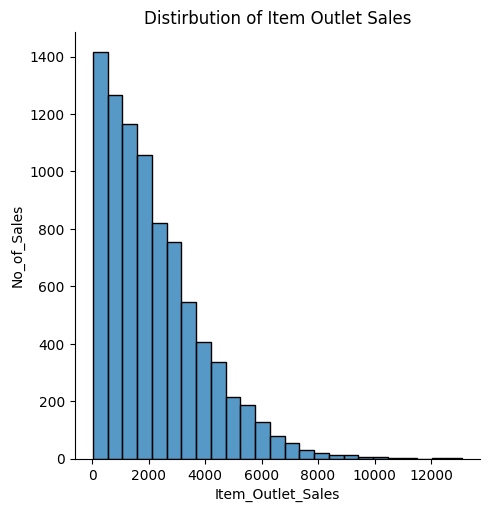

In [ ]:
# lets start with target variable, distribution of target variable 'Item_Outlet_Sales' is as follows:

plt.figure(figsize=(12,7))
sns.displot(data.Item_Outlet_Sales, bins = 25)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('No_of_Sales')
plt.title('Distirbution of Item Outlet Sales')

In [ ]:
print("Skewness :", data.Item_Outlet_Sales.skew())
print("kurtosis :", data.Item_Outlet_Sales.kurtosis())

Skewness : 1.1775306028542796
kurtosis : 1.6158766814287264


From the above it is understood that the target variable is skewed to the right, we need normalize it

Numerical Predictors

In [ ]:
# checking the dependent variables now, lets go ahead with the numerical variables
num_features = data.select_dtypes(['float64','int64'])

In [ ]:
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

out of 12 only 5 are numerical types


Lets identify correlation between numerical variables and Target variable

In [ ]:
corr = num_features.corr()

In [ ]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

From the above, its observed that Item_MRP has the most positive correlation and Item_visibility has the lowest negative correlation with the target variable. Investigating further

Categorical Predictors

In [ ]:
# check the categorical features
def cat_plot(cat_features):
  for feature in cat_features:
   sns.countplot(cat_features[feature])
   plt.title(feature)
   plt.show()

In [ ]:
cat_features = data.select_dtypes(['object'])

# dropping this feature as it is a unique identifier for the products
cat_features.drop(columns=['Item_Identifier'], axis=1, inplace=True)

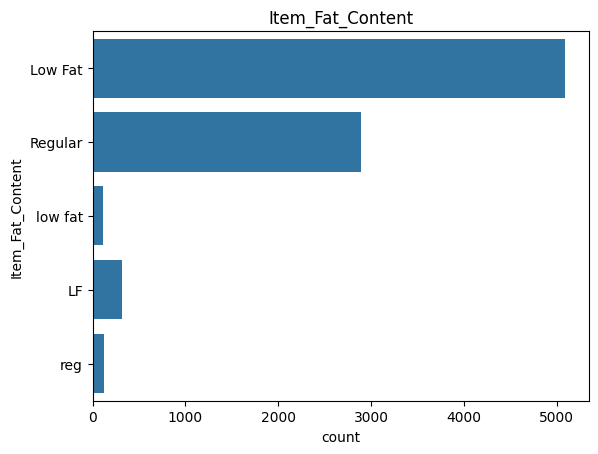

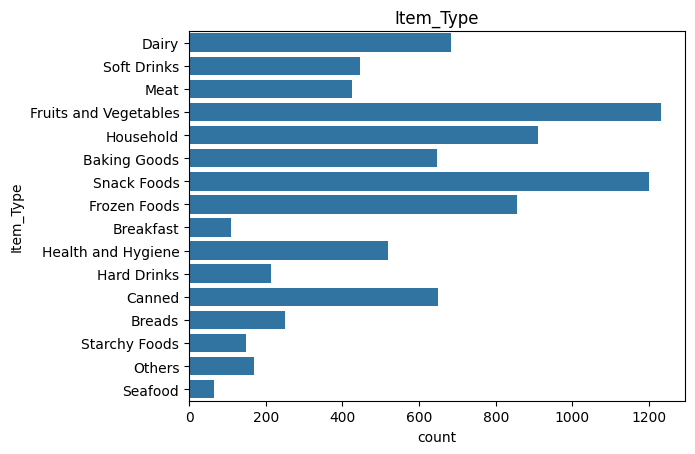

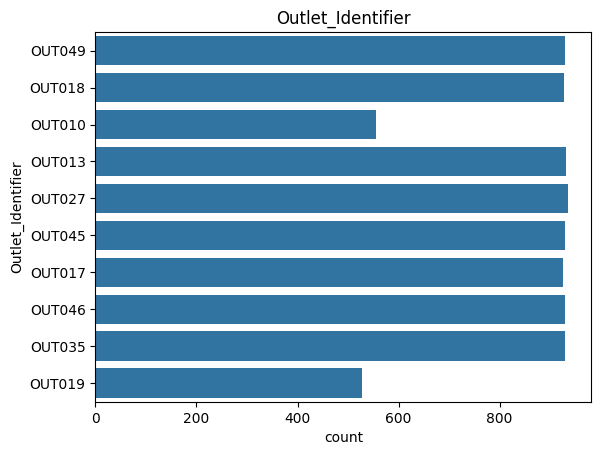

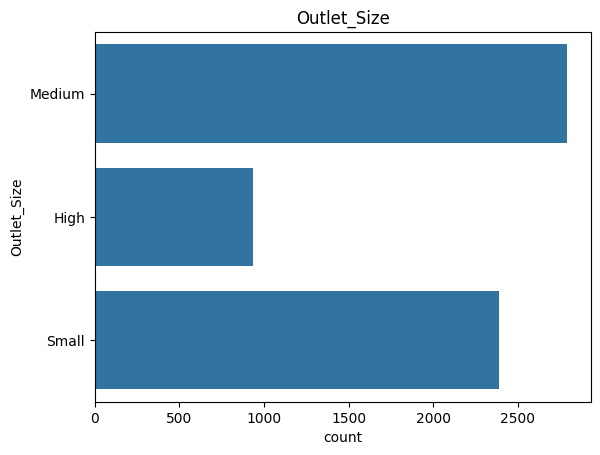

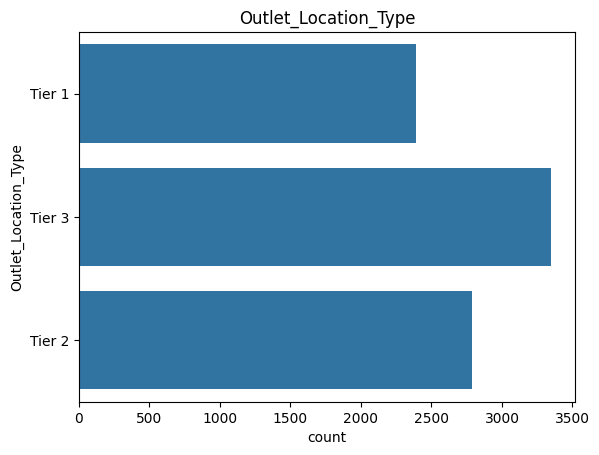

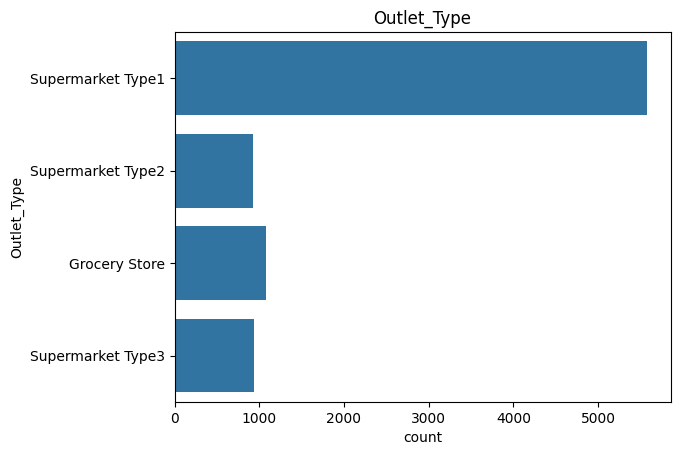

In [ ]:
cat_plot(cat_features)

Changes to be made in the data:
1. For the fat content there are only two values Low Fat and Regular, however the data shows 4 values.
2. Item type has 16 different categories, these are too many for categorical feature, we should try to club some them together
3. Outlet identifier shows equal distribution across all the outlets except fro OUT010 and OUT019
4. Outlet_Size has 3 types of outlets with medium outlets having a higher count small and then high size
5. Outlet location type shows 3 tiers, with tier 3 having more values as compared to tier 2 and tier 1. We need to identify if there is some relation betwwen type and size of the outlet
6. Outlet_Type has 4 values with Supermarket type 1 having the highest number, Supermarket type 2 and type 3 are equal in number. We ca create a single category for the 3, but we should see the impact on target variable



Bivariate Analysis

Lets see the realtionship between the target and predictors

Starting with the numerical features



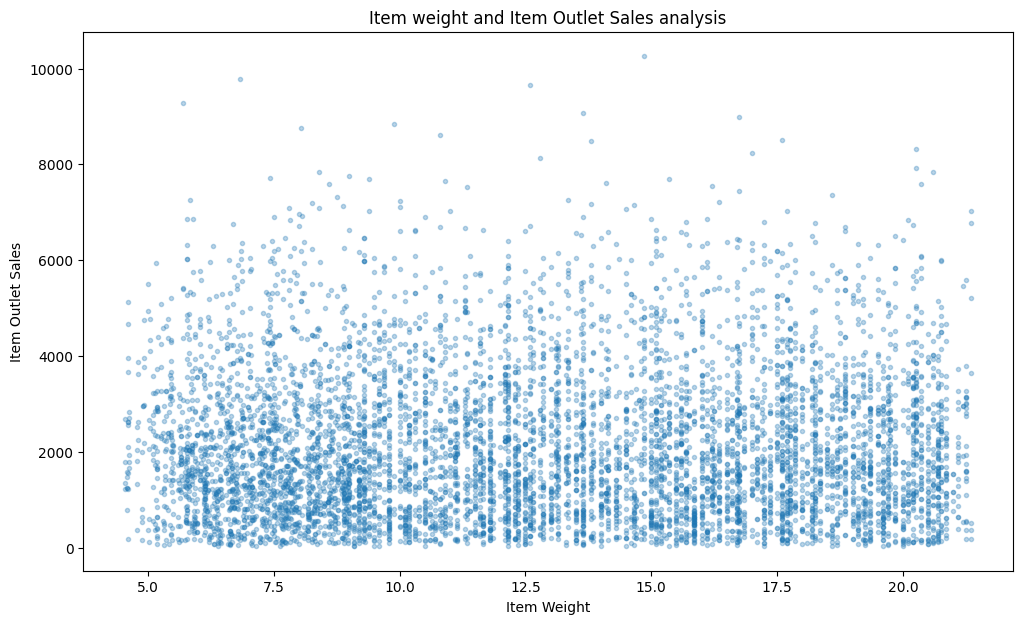

In [ ]:
# Item_Weight and Item_Outlet_Sales analysis
plt.figure(figsize=(12,7))
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Item weight and Item Outlet Sales analysis')
plt.plot(data['Item_Weight'], data['Item_Outlet_Sales'],'.', alpha= 0.3)

As seen previously, we see that item_weight and item_outlet_sales has a very low correlation


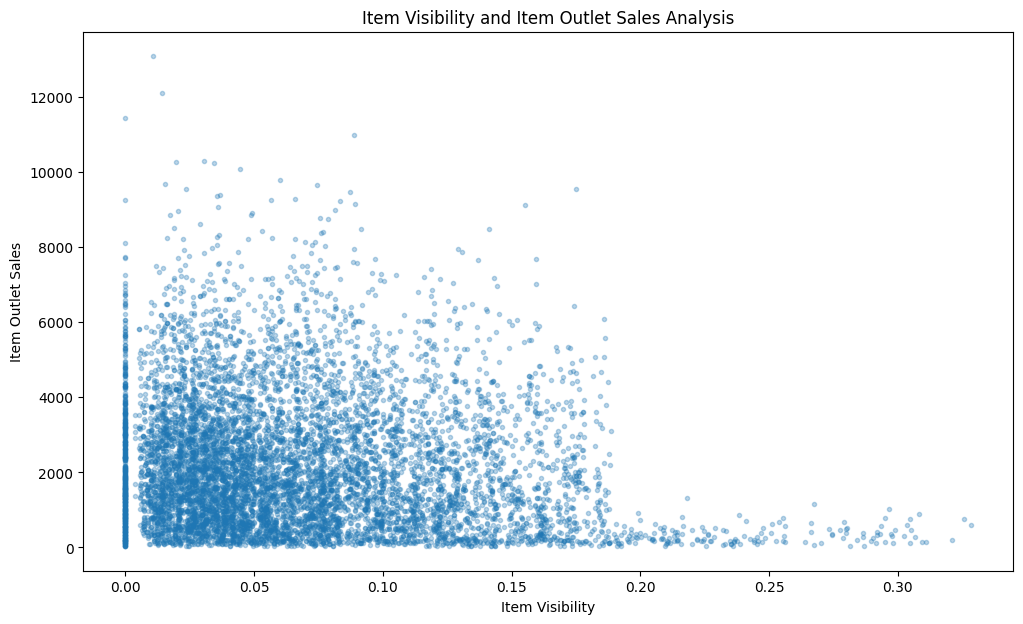

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibility and Item Outlet Sales Analysis')
plt.plot(data['Item_Visibility'], data['Item_Outlet_Sales'],'.',alpha= 0.3)

Item visibility has very low correlation, it means there are other factors influencing the sales of an item

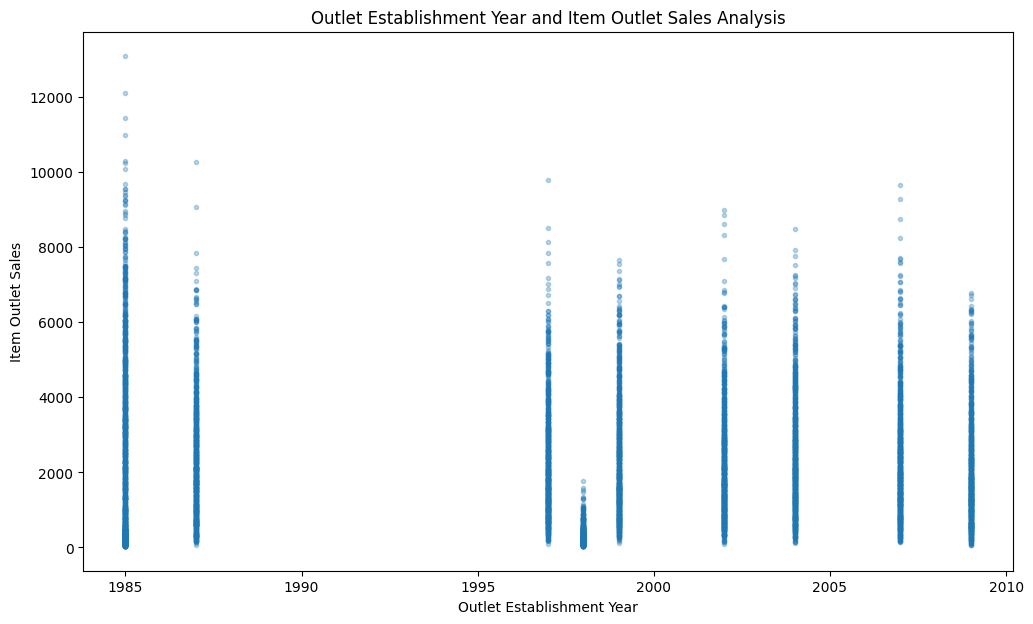

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Establishment Year and Item Outlet Sales Analysis')
plt.plot(data['Outlet_Establishment_Year'],data['Item_Outlet_Sales'],'.',alpha=0.3)

Theer seems to be no relation betwwen the year of establishment vs the sales

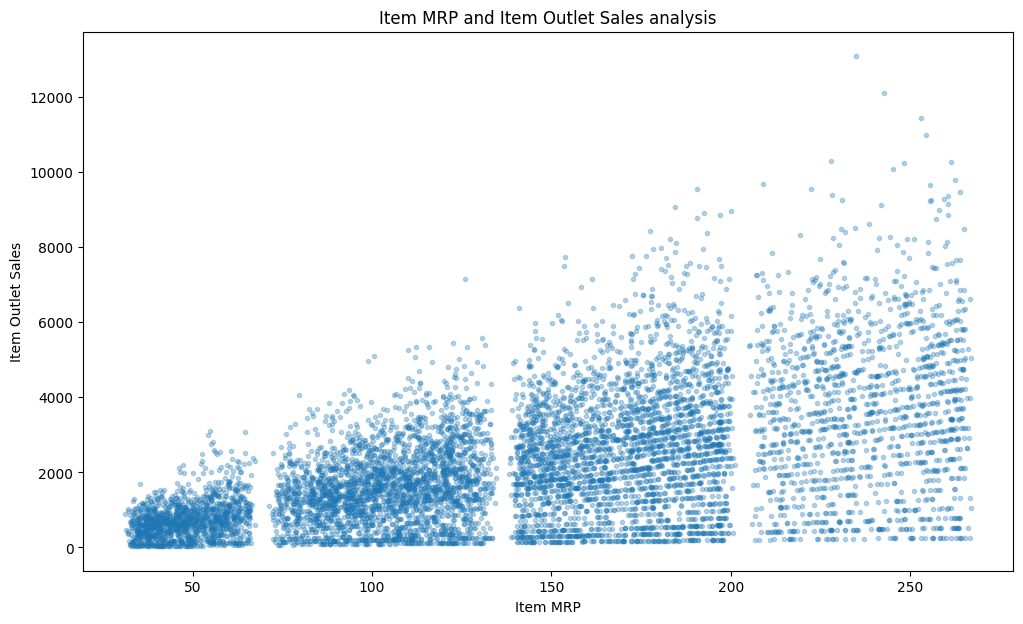

In [ ]:
# Item_MRP and Item_Outlet_Sales analysis
plt.figure(figsize=(12,7))
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Item MRP and Item Outlet Sales analysis')
plt.plot(data['Item_MRP'], data['Item_Outlet_Sales'],'.', alpha= 0.3)

**Lets analyze the categorical variables now**

Impact of Item fat content on outlet sales

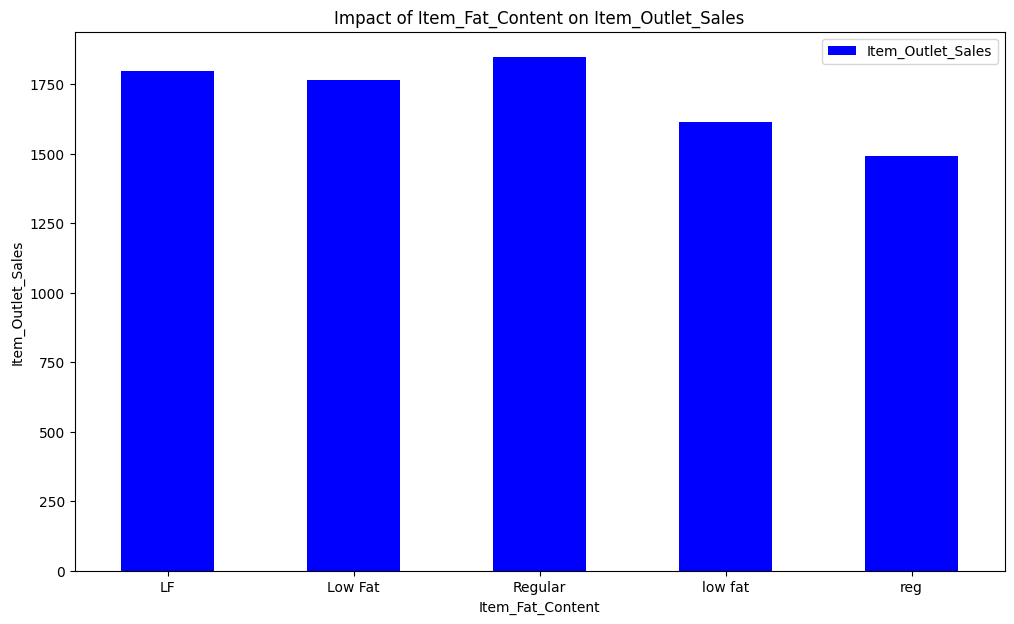

In [ ]:
Item_Fat_Content_pivot = data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat product shows higher sales as compared to regular fat products

<ipython-input-20-786f6137a51b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Item_Type_pivot = data.pivot_table(index=['Item_Type'], values='Item_Outlet_Sales', aggfunc=np.median)


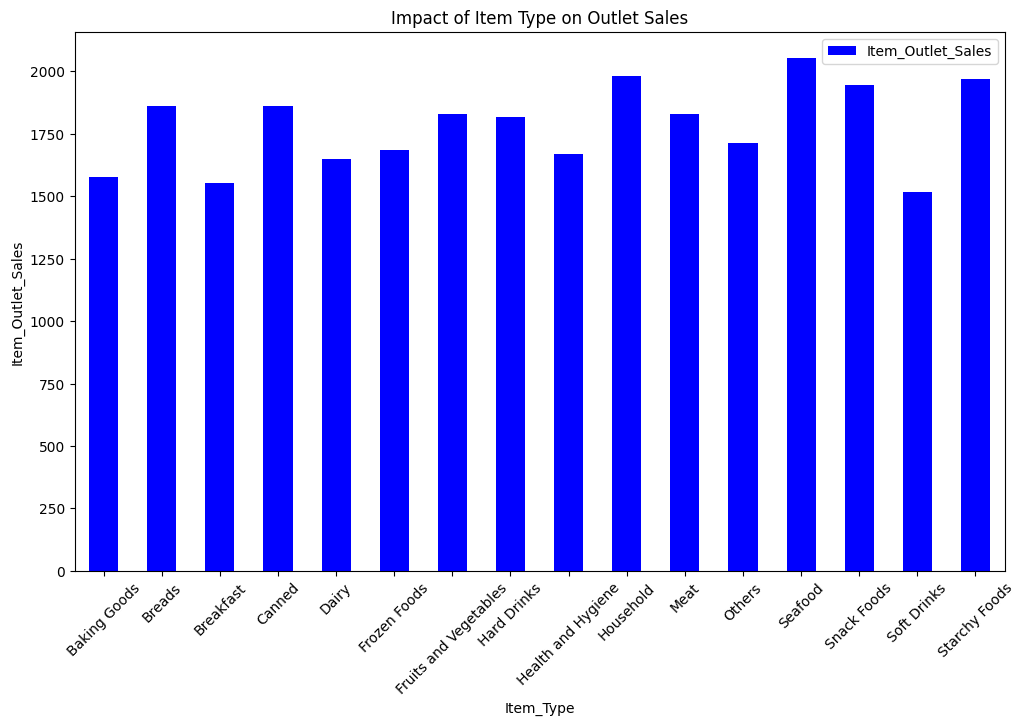

In [ ]:
data.Item_Type_pivot = data.pivot_table(index=['Item_Type'], values='Item_Outlet_Sales', aggfunc=np.median)
data.Item_Type_pivot.plot(kind='bar', color='b',figsize=(12,7))

plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item Type on Outlet Sales')
plt.xticks(rotation=45)
plt.show()


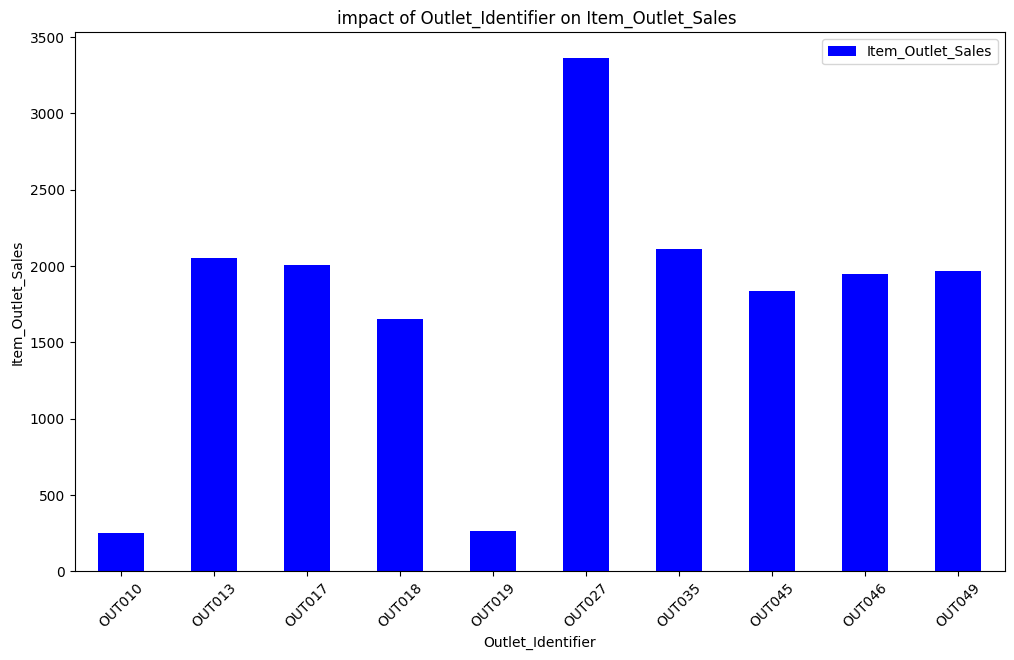

In [ ]:
outlet_identifier_pivot = data.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales',aggfunc= np.median)
outlet_identifier_pivot.plot(kind='bar', color = 'b', figsize=(12,7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('impact of Outlet_Identifier on Item_Outlet_Sales ')
plt.xticks(rotation = 45)
plt.show()

OUT010 and OUT019 has least sales, while OUT027 has the maximum sales. We need to identify the type of the stores

In [ ]:
data.pivot_table(values='Outlet_Type',
              columns='Outlet_Identifier',
              aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


OUT010 and OUT019 are grocery stores while other outlets are Supermarket

In [ ]:
data.pivot_table(columns='Outlet_Size', values='Outlet_Type', aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


SuperMarket type 3 which is a medium size store has excellent sales, most of the spermarkets are OUT013, OUT017, OUT035, OUT045, OUT046, OUT049 are high ans small but they dont ahve good sales

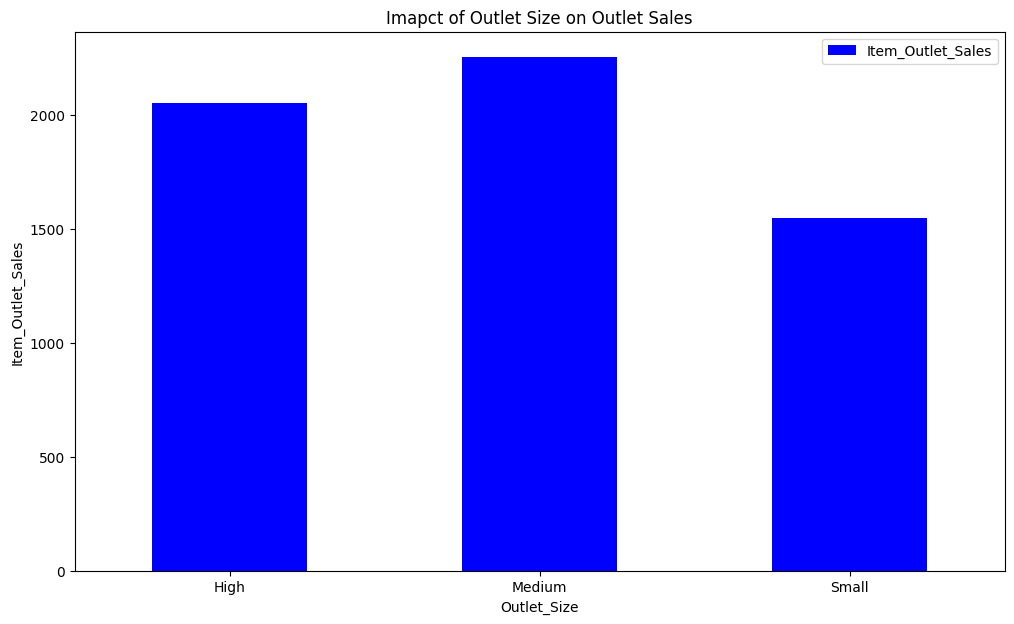

In [ ]:
# impact of outlet size on outlet sales
outlet_size_pivot = data.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
outlet_size_pivot.plot(kind='bar', color = 'b', figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Imapct of Outlet Size on Outlet Sales')
plt.xticks(rotation=0)
plt.show()


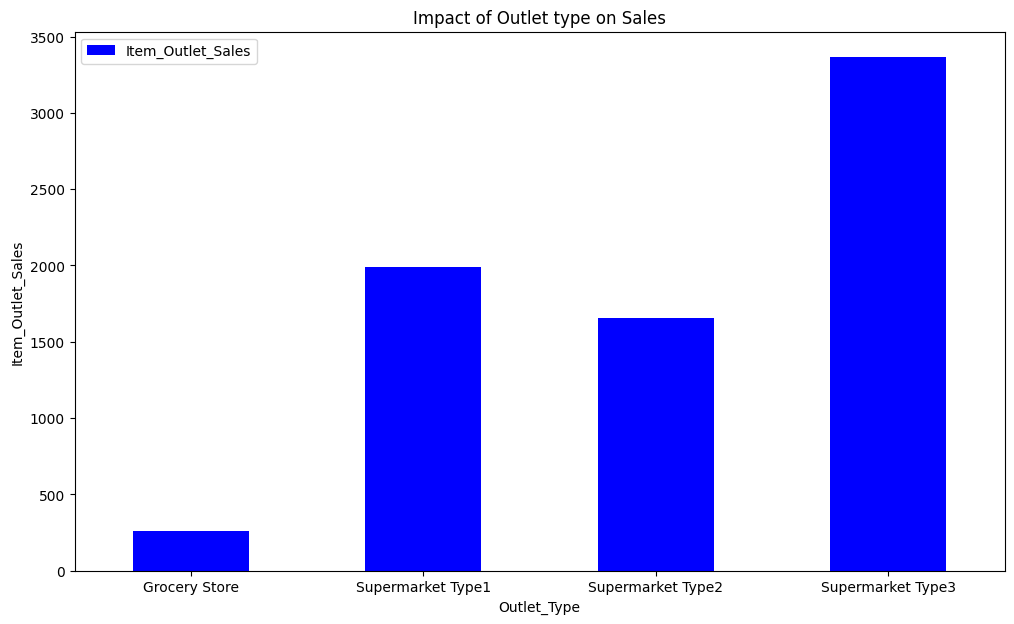

In [ ]:
# impact of Outlet_type on sales
Outlet_Type_pivot = data.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='b', figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet type on Sales')
plt.xticks(rotation=0)
plt.show()

It could be a good idea to create new feature which shoes outlet sales wrt to store size

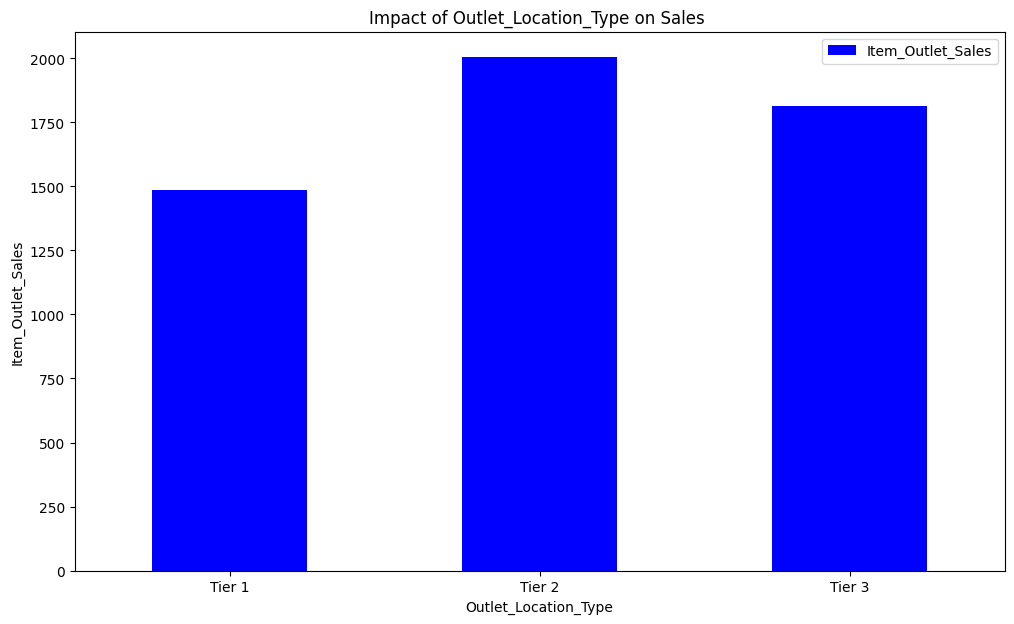

In [ ]:
outlet_location_type_pivot = data.pivot_table(index='Outlet_Location_Type', values='Item_Outlet_Sales', aggfunc= np.median)
outlet_location_type_pivot.plot(kind='bar', color='b', figsize=(12,7))
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Location_Type on Sales ')
plt.xticks(rotation=0)
plt.show()

Tier 2 cities have higher sales than tier 1 and tier 3

In [ ]:
data.pivot_table(columns='Outlet_Type',values='Outlet_Location_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


# **Data Preprocessing**

Look for missing values
Since our train and test files are different, lets first combine them, so we don't have to repeat the process again

In [ ]:
data_test = pd.read_csv('test_FewQE9B.csv')

In [ ]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
data_train_test = pd.concat([data,data_test], ignore_index = True )

In [ ]:
data_train_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [ ]:
print(data.shape, data_test.shape, data_train_test.shape)

(8523, 12) (5681, 11) (14204, 12)


In [ ]:
# check for percentage of missing values in the data
data_train_test.isnull().sum()/data_train_test.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

Outlet sales has 40 % missing values, because our test data does not have that column, the two features that need missing value impuation are Item_Weight and Outlet_Size

Item_weight is numerical feature hence, we can use mean or median
Outlet_Size is a categorical feature, hence we will use mode for imputation

In [ ]:
data_train_test['Item_Weight'].fillna(data_train_test['Item_Weight'].mean(), inplace=True)

In [ ]:
data_train_test['Outlet_Size'].fillna(data_train_test['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
# check for percentage of missing values in the data
data_train_test.isnull().sum()/data_train_test.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

Feature Engineering

In [ ]:
data_train_test['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [ ]:

# Creates pivot table with Outlet_Type and the mean of
#Item_Outlet_Sales. Agg function is by default mean()
data_train_test.pivot_table(values='Item_Outlet_Sales', columns = 'Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


The average sales are different for different outlet_type, so we can't combine the different outlet_types





In [ ]:
# For item_visibility the minimum value is 0 which makes no sense, considering that as a missing value and imputing it with mean

In [ ]:


print(len(data_train_test[data_train_test['Item_Visibility']==0]))
data_train_test['Item_Visibility'].replace(0,np.nan, inplace=True)
data_train_test['Item_Visibility'].fillna(data_train_test['Item_Visibility'].mean(), inplace=True)


879


In [ ]:
print(len(data_train_test[data_train_test['Item_Visibility']==0]))

0


In [ ]:
# Determine the age of stores using year of establishment year using 2013 as our reference point as the data is from 2013
data_train_test['Outlet_Years'] = 2013 - data_train_test['Outlet_Establishment_Year']
data_train_test['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [ ]:
# create a broad category for Item_type
# there are 16 categories, so we need to reduce that to a lower number based on some similarities between the products


In [ ]:
# since the first charcters of item_identifier divides the items braodly into Food, Drinks and Non consumable items, we will use that
data_train_test['New_Item_Type'] = data_train_test['Item_Identifier'].apply(lambda x:x[0:2])

In [ ]:
data_train_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,Low Fat,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,16,FD
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,4,FD
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,11,NC
14202,FDJ26,15.30,Regular,0.070303,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,6,FD


In [ ]:
# working on the item_fat_content
data_train_test['Item_Fat_Content'] = data_train_test['Item_Fat_Content'].replace({'Low Fat':'LF', 'Regular' : 'reg', 'low fat': 'LF'})

In [ ]:
# non consumable items also show fat content, we should create a seperate category for that
data_train_test[data_train_test['New_Item_Type']=='NC']['Item_Fat_Content'].unique()

array(['LF'], dtype=object)

In [ ]:
data_train_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,reg,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,LF,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,reg,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,16,FD
14200,FDD47,7.60,reg,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,4,FD
14201,NCO17,10.00,LF,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,11,NC
14202,FDJ26,15.30,reg,0.070303,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,6,FD


In [ ]:
data_train_test.loc[data_train_test['New_Item_Type']=='NC', "Item_Fat_Content"]= "Non-Edible"

In [ ]:
data_train_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,reg,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,Non-Edible,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,reg,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,16,FD
14200,FDD47,7.60,reg,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,4,FD
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,11,NC
14202,FDJ26,15.30,reg,0.070303,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,6,FD


In [ ]:
data_train_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years', 'New_Item_Type'],
      dtype='object')

In [ ]:
data_train_test.drop(columns=['Outlet_Establishment_Year', 'Item_Type'], axis=1,inplace=True)

In [ ]:
#converting categories into numbers using map function
data_train_test['Item_Fat_Content'] = data_train_test['Item_Fat_Content'].map({'Non-Edible':0, 'LF':1 ,'reg':2})
data_train_test['New_Item_Type'] = data_train_test['New_Item_Type'].map({'NC':0, 'DR':1 ,'FD':2})
data_train_test['Outlet_Size'] = data_train_test['Outlet_Size'].map({'Small':0, 'Medium':1 ,'High':2})
data_train_test['Outlet_Location_Type'] = data_train_test['Outlet_Location_Type'].map({'Tier 1':0, 'Tier 2':1 ,'Tier 3':2})
data_train_test['Outlet_Type'] = data_train_test['Outlet_Type'].map({'Grocery Store':0, 'Supermarket Type1':1 ,'Supermarket Type2':2,'Supermarket Type3':3})
data_train_test['Outlet_Identifier'] = data_train_test['Outlet_Identifier'].map({'OUT049':0, 'OUT018':1, 'OUT010':2, 'OUT013':3, 'OUT027':4, 'OUT045':5,
       'OUT017':6, 'OUT046':7, 'OUT035':8, 'OUT019':9})

In [ ]:
data_train_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.30,1,0.016047,249.8092,0,1,0,1,3735.1380,14,2
1,DRC01,5.92,2,0.019278,48.2692,1,1,2,2,443.4228,4,1
2,FDN15,17.50,1,0.016760,141.6180,0,1,0,1,2097.2700,14,2
3,FDX07,19.20,2,0.070303,182.0950,2,1,2,0,732.3800,15,2
4,NCD19,8.93,0,0.070303,53.8614,3,2,2,1,994.7052,26,0


In [ ]:
#Normalzing the data features to bring them in the range of 0 and 1
# Bringing the range of all variables between 0 and 1 using normalization Xnorm = (X - X min) /(X max - X min)
data_train_test1= data_train_test.drop(columns=['Item_Outlet_Sales'], axis=1)
# data_train_test1['Item_Outlet_Sales'] = data_train_test['Item_Outlet_Sales']

In [ ]:
data_train_test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_Type
0,FDA15,9.30,1,0.016047,249.8092,0,1,0,1,14,2
1,DRC01,5.92,2,0.019278,48.2692,1,1,2,2,4,1
2,FDN15,17.50,1,0.016760,141.6180,0,1,0,1,14,2
3,FDX07,19.20,2,0.070303,182.0950,2,1,2,0,15,2
4,NCD19,8.93,0,0.070303,53.8614,3,2,2,1,26,0


In [ ]:
# for col in data_train_test1.columns[1:]:
#   data_train_test1[col] = (data_train_test1[col] - data_train_test1[col].min()) / (data_train_test1[col].max() - data_train_test1[col].min())

In [ ]:
# trying with min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_train_test.iloc[:, 1:]), columns=data_train_test.columns[1:])

In [ ]:
df_scaled.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,0.282525,0.5,0.038399,0.927507,0.000000,0.5,0.0,0.333333,0.283587,0.416667,1.0
1,0.081274,1.0,0.048346,0.072068,0.111111,0.5,1.0,0.666667,0.031419,0.000000,0.5
2,0.770765,0.5,0.040593,0.468288,0.000000,0.5,0.0,0.333333,0.158115,0.416667,1.0
3,0.871986,1.0,0.205435,0.640093,0.222222,0.5,1.0,0.000000,0.053555,0.458333,1.0
4,0.260494,0.0,0.205435,0.095805,0.333333,1.0,1.0,0.333333,0.073651,0.916667,0.0


In [ ]:
data.shape

(8523, 12)

In [ ]:
#splitting the data back into train and test
data_train = df_scaled.iloc[:data.shape[0], :]
val_data = df_scaled.iloc[data.shape[0]:, :]

In [ ]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,0.282525,0.5,0.038399,0.927507,0.000000,0.5,0.0,0.333333,0.283587,0.416667,1.0
1,0.081274,1.0,0.048346,0.072068,0.111111,0.5,1.0,0.666667,0.031419,0.000000,0.5
2,0.770765,0.5,0.040593,0.468288,0.000000,0.5,0.0,0.333333,0.158115,0.416667,1.0
3,0.871986,1.0,0.205435,0.640093,0.222222,0.5,1.0,0.000000,0.053555,0.458333,1.0
4,0.260494,0.0,0.205435,0.095805,0.333333,1.0,1.0,0.333333,0.073651,0.916667,0.0


In [ ]:
val_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
8523,0.964275,0.5,0.012284,0.325012,0.000000,0.5,0.0,0.333333,NaN,0.416667,1.0
8524,0.222983,1.0,0.107301,0.237819,0.666667,0.5,0.5,0.333333,NaN,0.083333,1.0
8525,0.598095,0.0,0.295552,0.893316,0.222222,0.5,1.0,0.000000,NaN,0.458333,0.0
8526,0.164335,0.5,0.036370,0.525233,0.666667,0.5,0.5,0.333333,NaN,0.083333,1.0
8527,0.490494,1.0,0.354122,0.861381,0.444444,0.5,1.0,1.000000,NaN,1.000000,1.0


In [ ]:
X = data_train.drop(['Item_Outlet_Sales'],axis=1)
y = data_train['Item_Outlet_Sales']
X_val = val_data.drop(['Item_Outlet_Sales'],axis=1)

In [ ]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Years', 'New_Item_Type'],
      dtype='object')

In [ ]:
X_val.columns


Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Years', 'New_Item_Type'],
      dtype='object')

In [ ]:
X.shape, y.shape, X_val.shape


((8523, 10), (8523,), (5681, 10))

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state=10)

**Linear Regression Model**

In [ ]:
# create a lR modelf

from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
lr_pred

array([0.31148245, 0.12132068, 0.2342025 , ..., 0.08556281, 0.19868381,
       0.23103005])

In [ ]:
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

52

**Decision Tree Model**

In [ ]:
# creating decision tree model
from sklearn.tree import DecisionTreeRegressor



tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [ ]:
tree_pred

array([0.31744599, 0.13938175, 0.24931807, ..., 0.0680297 , 0.26409364,
       0.19085195])

In [ ]:
tree_accuracy = round(tree.score(X_train,y_train)*100)
tree_accuracy

61

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,y_train)

rf_accuracy = round(rf.score(X_train,y_train)*100)

rf_accuracy

60

In [ ]:
# creating a neural network model


In [ ]:
(X_train.shape, y_train.shape), (X_test.shape)

(((6818, 10), (6818,)), (1705, 10))

In [ ]:
# definining the architecture of the model
import keras
import tensorflow as tf

# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense



In [ ]:
# number of neurons, shpuld be equal to the no. of features
X_train.shape[1]

10

In [ ]:
input_neurons = X_train.shape[1]

# importing different layers from keras
from keras.layers import InputLayer, Dense

from keras.optimizers import Adam


# define number of output neurons
output_neurons = 1

In [ ]:
# no of hidden layers and hidden neurons

# it is a hyperparameter and we can pick the hidden layers and hidden nuerons on our own


# define hidden layers and neurons on each layer
number_hidden_layer = 5
neuron_hidden_layer_1 = 50
neuron_hidden_layer_2 = 30
neuron_hidden_layer_3 = 10
neuron_hidden_layer_4 = 2
neuron_hidden_layer_5 = 1


In [ ]:
# activation function for different layers

# I chose relu as an activation function for hidden layers and softmax for the output layer since it is a binary classfication problem


# define the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape= (input_neurons,)))
model.add(Dense(units= neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_5, activation='relu'))
model.add(Dense(units=output_neurons))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2417 (9.44 KB)
Trainable params: 2417 (9.4

In [ ]:
# compile the model
# loss as binary crossentropy, since we have bibary classification problem
# defining the optimizer as adam
# evaluation metric as accuracy

# learning_rate = 0.0001
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])


In [ ]:
# training the model

# passing the independent and dependent features of training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 100)

Epoch 1/100
214/214 [==============================] - 2s 4ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0883 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0625
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0624 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0653
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0609 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0594
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0602 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0623
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0597 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0585
Epoch 6/100
214/214 [==============================] - 1s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0588 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0586
Epoch 7/10

In [ ]:
  # getting predcition for the validation set
prediction = model.predict(X_test)

54/54 [==============================] - 0s 1ms/step


In [ ]:
prediction

array([[0.34922126],
       [0.14046596],
       [0.24615069],
       ...,
       [0.06606071],
       [0.29270256],
       [0.21598227]], dtype=float32)

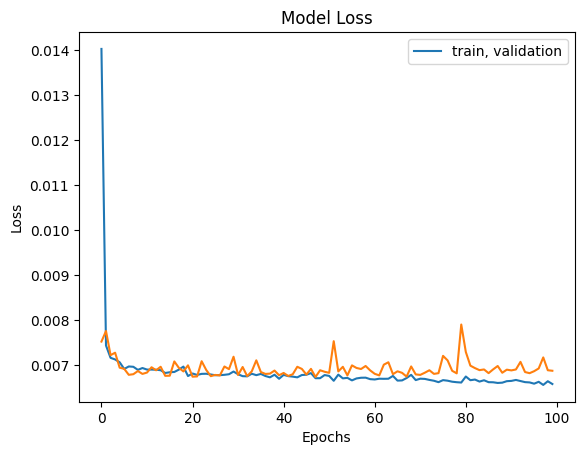

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train, validation'], loc='upper right')
plt.show()

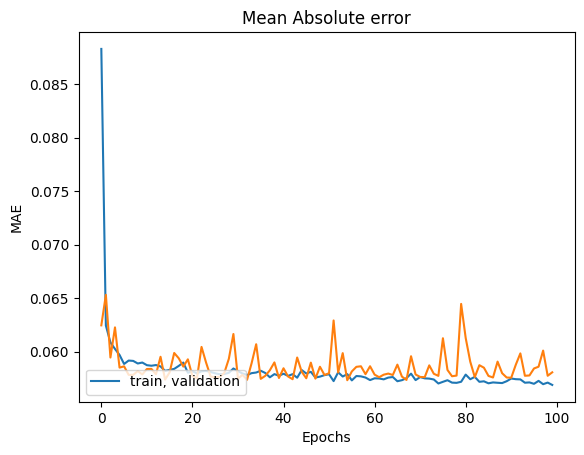

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Mean Absolute error')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['train, validation'], loc='lower left')
plt.show()

In [ ]:
prediction

array([[0.34922126],
       [0.14046596],
       [0.24615069],
       ...,
       [0.06606071],
       [0.29270256],
       [0.21598227]], dtype=float32)

In [ ]:
# prompt: how to convert back the predictions into normal values

y_pred_denormalized = (prediction * (data['Item_Outlet_Sales'].max() - data['Item_Outlet_Sales'].min())) + data['Item_Outlet_Sales'].min()
y_test_denormalized = (y_test * (data['Item_Outlet_Sales'].max() - data['Item_Outlet_Sales'].min())) + data['Item_Outlet_Sales'].min()


In [ ]:
y_test

7186    0.277007
2283    0.138835
2206    0.202387
5446    0.049220
6380    0.285117
          ...   
2879    0.035091
6094    0.010150
1598    0.091299
8012    0.238498
7756    0.193818
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [ ]:
y_test_denormalized


7186    3649.2498
2283    1845.5976
2206    2675.1844
5446     675.7870
6380    3755.1120
          ...    
2879     491.3604
6094     165.7842
1598    1225.0720
8012    3146.5708
7756    2563.3300
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [ ]:
# calcualting predictions on Validation data
X_val = val_data.drop(['Item_Outlet_Sales'],axis=1)
prediction_val = model.predict(X_val)

178/178 [==============================] - 1s 4ms/step


In [ ]:
X_val.reset_index()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_Type
0,8523,0.964275,0.5,0.012284,0.325012,0.000000,0.5,0.0,0.333333,0.416667,1.0
1,8524,0.222983,1.0,0.107301,0.237819,0.666667,0.5,0.5,0.333333,0.083333,1.0
2,8525,0.598095,0.0,0.295552,0.893316,0.222222,0.5,1.0,0.000000,0.458333,0.0
3,8526,0.164335,0.5,0.036370,0.525233,0.666667,0.5,0.5,0.333333,0.083333,1.0
4,8527,0.490494,1.0,0.354122,0.861381,0.444444,0.5,1.0,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,14199,0.353974,1.0,0.030546,0.467004,0.777778,0.0,0.0,0.333333,0.500000,1.0
5677,14200,0.181304,1.0,0.429216,0.585126,0.111111,0.5,1.0,0.666667,0.000000,1.0
5678,14201,0.324204,0.0,0.215364,0.371199,0.555556,0.5,0.5,0.333333,0.291667,0.0
5679,14202,0.639774,1.0,0.205435,0.778154,0.666667,0.5,0.5,0.333333,0.083333,1.0


In [ ]:
prediction_val =  np.clip(prediction_val, 0, prediction_val.max())

In [ ]:
prediction_val

array([[0.10782757],
       [0.11996724],
       [0.0573578 ],
       ...,
       [0.14142433],
       [0.2881263 ],
       [0.09085145]], dtype=float32)

In [ ]:
#rescaling it back
prediction_val1 = (prediction_val * (data['Item_Outlet_Sales'].max() - data['Item_Outlet_Sales'].min())) + data['Item_Outlet_Sales'].min()

In [ ]:
prediction_csv = pd.DataFrame()

In [ ]:
test_data = pd.read_csv('test_FewQE9B.csv')
prediction_csv['Item_Identifier'] = test_data['Item_Identifier']
prediction_csv['Outlet_Identifier'] = test_data['Outlet_Identifier']

In [ ]:
prediction_csv['predictions'] = prediction_val1

In [ ]:
prediction_csv.head()

,Item_Identifier,Outlet_Identifier,predictions
0,FDW58,OUT049,1440.836182
1,FDW14,OUT017,1599.303467
2,NCN55,OUT010,782.019958
3,FDQ58,OUT017,2529.165771
4,FDY38,OUT027,5606.085938


In [ ]:
prediction_csv.to_csv('Solutions_BigMart_NN_TruptiK.csv')

In [ ]:
# using functional API in keras
from keras import Model, Input
from keras.layers import InputLayer,concatenate

In [ ]:

# define hidden layers and neurons on each layer
number_hidden_layer = 5
neuron_hidden_layer_1_1 = 50
neuron_hidden_layer_1_2 = 40
neuron_hidden_layer_2 = 30
neuron_hidden_layer_3 = 10
neuron_hidden_layer_4 = 2
neuron_hidden_layer_5 = 1

In [ ]:


# define the architecture of the model
x = Input(shape=(input_neurons,))
hidden_1_1= Dense(units=neuron_hidden_layer_1_1, activation='relu')(x)
hidden_1_2= Dense(units=neuron_hidden_layer_1_2, activation='relu')(x)

combined = concatenate([hidden_1_1,hidden_1_2])
hidden_2 = Dense(units=neuron_hidden_layer_2, activation='relu')(combined)
hidden_3 = Dense(units=neuron_hidden_layer_3, activation='relu')(hidden_2)
hidden_4 = Dense(units=neuron_hidden_layer_4, activation='relu')(hidden_3)
hidden_5 = Dense(units=neuron_hidden_layer_5, activation='relu')(hidden_4)
output = Dense(units=output_neurons)(hidden_5)

model_functional = Model(x, output)

In [ ]:
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_27 (Dense)            (None, 50)                   550       ['input_5[0][0]']             
                                                                                                  
 dense_28 (Dense)            (None, 40)                   440       ['input_5[0][0]']             
                                                                                                  
 concatenate_3 (Concatenate  (None, 90)                   0         ['dense_27[0][0]',            
 )                                                                   'dense_28[0][0]']        

In [ ]:
# compiling the model
model_functional.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [ ]:
#Train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 100)

Epoch 1/100
214/214 [==============================] - 1s 4ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0570 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0585
Epoch 2/100
214/214 [==============================] - 1s 5ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0571 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0579
Epoch 3/100
214/214 [==============================] - 1s 4ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0572 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0576
Epoch 4/100
214/214 [==============================] - 1s 4ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0571 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0591
Epoch 5/100
214/214 [==============================] - 1s 4ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0570 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0586
Epoch 6/100
214/214 [==============================] - 1s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0572 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0579
Epoch 7/10

In [ ]:
# evaluate model performance
  # getting predcition for the validation set
prediction = model_functional.predict(X_test)

54/54 [==============================] - 0s 3ms/step


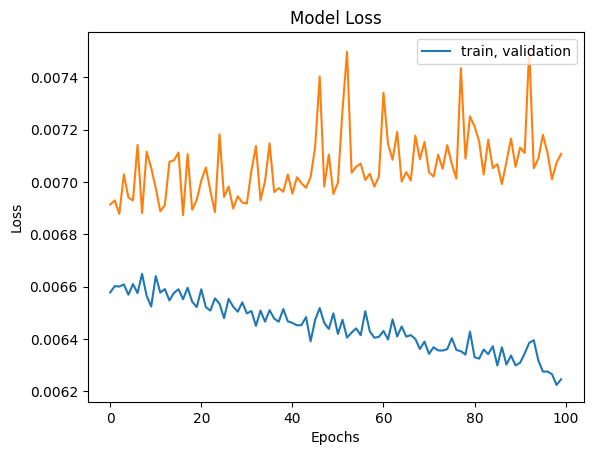

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train, validation'], loc='upper right')
plt.show()

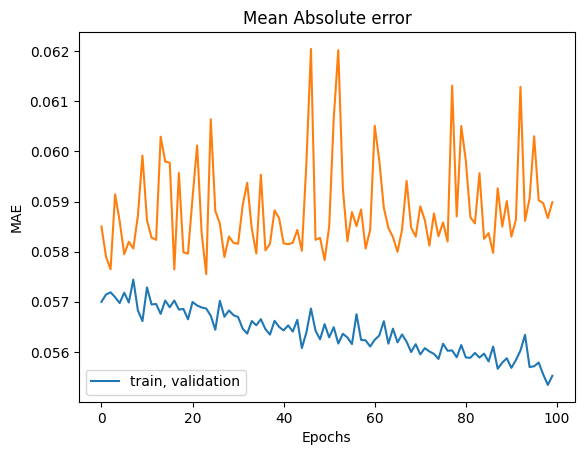

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Mean Absolute error')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['train, validation'], loc='lower left')
plt.show()